In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def show_image(x, y, i):
  plt.figure(figsize = (20,2))
  plt.imshow(x[i])
  plt.xlabel(classes[y[i]])

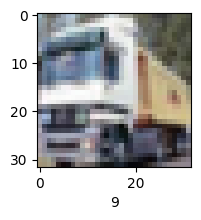

In [8]:
show_image(X_train, y_train, 1)

In [9]:
X_train = X_train/255.0
x_test = X_test/255.0

Building a CNN model

In [10]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')

])

In [11]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4843 - accuracy: 0.4681
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1403 - accuracy: 0.5989
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0053 - accuracy: 0.6487
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9195 - accuracy: 0.6802
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8517 - accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7922 - accuracy: 0.7232
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7446 - accuracy: 0.7415
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7002 - accuracy: 0.7550
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6605 - accuracy: 0.7692
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [13]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 234.7027 - accuracy: 0.5054


[234.70265197753906, 0.5054000020027161]

In [14]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [15]:
y_pred[:3]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.2557872e-31, 0.0000000e+00],
       [1.5943120e-22, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:3]

[3, 1, 8]

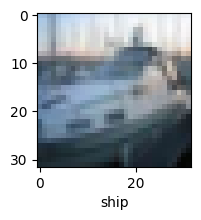

In [22]:
show_image(X_test, y_test, 2)

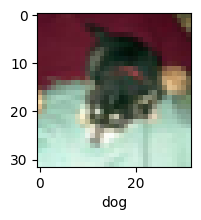

In [23]:
show_image(X_test, y_test, 128)

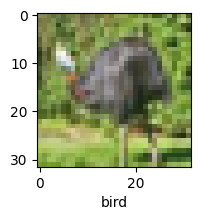

In [24]:
show_image(X_test, y_test, 9090)